## Исследование пользователей приложения Procrastinate Pro+

**Цели исследования**

Выполняя роль маркетингового аналитика развлекательного приложения Procrastinate Pro+, необходимо разобраться в причинах, по которым не окупаются вложения в рекламу и понять как это можно исправить.

**Вопросы, на которые нужно ответить в процессе исследования:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных**

В нашем распоряжении три датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

1. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

2. Файл orders_info_short.csv хранит информацию о заказах:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

3. Файл costs_info_short.csv хранит информацию о расходах на рекламу:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**Исследование пройдёт в несколько шагов:**

- Первичный анализ входных данных;
- Предобработка данных;
- Создание шаблонных функций для анализа;
- Исследовательский анализ данных;
- Исследование общих маркетинговых показателей;
- Оценка окупаемости рекламы;
- Общий вывод.

## Шаг 1. Подготовка входных данных и первичный анализ данных

In [1]:
#импортируем необходимые библиотеки и настройки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

# отобразим все числа с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

# уберем ограничение колонок в отображении
pd.set_option('display.max_columns', None)

In [2]:
# откроем файлы, присвоим им переменные visits, orders, costs
try:
    visits = pd.read_csv(r'D:\datasets/visits_info_short.csv') # данные о посещениях
    orders = pd.read_csv(r'D:\datasets/orders_info_short.csv') # выгрузка покупок
    costs =  pd.read_csv(r'D:\datasets/costs_info_short.csv')  # рекламные расходы
    
except: 
    visits = pd.read_csv('/datasets/visits_info_short.csv') 
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
    
    


Рассмотрим датафрейм visits

In [3]:
# выведем первые 5 строк датафрейма visits
display(visits.head(5))

# выведем рандомные 5 строк датафрейма visits
display(visits.sample(5))

# выведем последние 5 строк датафрейма visits
display(visits.tail(5))

# выведем информацию о visits
visits.info()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id         Region  Device   Channel        Session Start  \
93901   219908997644  United States     Mac   organic  2019-08-02 13:07:15   
69881   260011599507  United States      PC    TipTop  2019-07-08 23:09:49   
33428   374604729853  United States  iPhone  FaceBoom  2019-06-03 20:23:07   
69105   226238827333  United States  iPhone    TipTop  2019-07-08 08:51:20   
109269  703389577401  United States     Mac  FaceBoom  2019-08-15 02:26:54   

                Session End  
93901   2019-08-02 13:26:21  
69881   2019-07-09 00:12:29  
33428   2019-06-03 21:32:34  
69105   2019-07-08 09:03:31  
109269  2019-08-15 02:27:27

User Id   Region Device         Channel        Session Start  \
309896  329994900775       UK     PC         LeapBob  2019-10-31 13:28:12   
309897  334903592310   France     PC  lambdaMediaAds  2019-10-31 22:14:52   
309898  540102010126  Germany     PC         organic  2019-10-31 01:40:48   
309899  308736936846  Germany    Mac         organic  2019-10-31 07:37:34   
309900  109329042535  Germany     PC  lambdaMediaAds  2019-10-31 14:17:43   

                Session End  
309896  2019-10-31 14:39:29  
309897  2019-10-31 22:39:36  
309898  2019-10-31 01:41:31  
309899  2019-10-31 07:37:55  
309900  2019-10-31 15:17:04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
# изучим уникальные значения в столбцах visits
display(visits['Region'].value_counts())
display(visits['Device'].value_counts())
display(visits['Channel'].value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: Region, dtype: int64

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: Device, dtype: int64

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: Channel, dtype: int64

Рассмотрим датафрейм orders

In [5]:
# выведем первые 5 строк датафрейма orders
display(orders.head(5))

# выведем рандомные 5 строк датафрейма orders
display(orders.sample(5))

# выведем последние 5 строк датафрейма orders
display(orders.tail(5))

# выведем информацию о orders
orders.info()

# изучим описательную статистику каждого столбца в orders
orders.describe(include='all')

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

User Id             Event Dt  Revenue
38445  972738370998  2019-10-14 03:30:24     4.99
8152   417418689158  2019-07-17 13:06:32     4.99
35023  474584533780  2019-09-07 06:53:32     4.99
38794   61368404773  2019-10-17 08:15:18     4.99
23532  852093157819  2019-10-11 10:51:44     4.99

User Id             Event Dt  Revenue
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
count         40212.00                40212 40212.00
unique             NaN                40163      NaN
top                NaN  2019-10-26 06:49:22      NaN
freq               NaN                    2      NaN
mean   499029531203.23                  NaN     5.37
std    286093675967.16                  NaN     3.45
min          599326.00                  NaN     4.99
25%    251132440436.75                  NaN     4.99
50%    498283972665.00                  NaN     4.99
75%    743332711780.00                  NaN     4.99
max    999895427370.00                  NaN    49.99

Рассмотрим датафрейм costs

In [6]:
# выведем первые 5 строк датафрейма costs
display(costs.head(5))

# выведем рандомные 5 строк датафрейма costs
display(costs.sample(5))

# выведем последние 5 строк датафрейма costs
display(costs.tail(5))

# выведем информацию о  costs
costs.info()

dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

dt             Channel  costs
1499  2019-06-29      WahooNetBanner  48.60
882   2019-10-10             YRabbit   5.28
584   2019-06-14              TipTop 163.40
1367  2019-08-16  OppleCreativeMedia  12.50
625   2019-07-25              TipTop 210.60

dt         Channel  costs
1795  2019-10-23  lambdaMediaAds   4.00
1796  2019-10-24  lambdaMediaAds   6.40
1797  2019-10-25  lambdaMediaAds   8.80
1798  2019-10-26  lambdaMediaAds   8.80
1799  2019-10-27  lambdaMediaAds  12.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
# изучим уникальные значения в столбцах costs
display(costs['Channel'].value_counts())

# изучим описательную статистику каждого столбца в costs
costs.describe(include='all')

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: Channel, dtype: int64

dt   Channel   costs
count         1800      1800 1800.00
unique         180        10     NaN
top     2019-05-01  FaceBoom     NaN
freq            10       180     NaN
mean           NaN       NaN   58.61
std            NaN       NaN  107.74
min            NaN       NaN    0.80
25%            NaN       NaN    6.50
50%            NaN       NaN   12.29
75%            NaN       NaN   33.60
max            NaN       NaN  630.00

In [8]:
# Изучим датафреймы на явные дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


## Промежуточный вывод 

1. Признаков явных и неявных дубликатов и наличия пропусков не обнаружено.
2. Датафрейм `visits` содержит в себе 6 столбцов и 309901 строк, датафрейм`orders` содержит в себе 3 столбца и 40212 строк, датафрейм `costs` содержит в себе 3 столбца и 1800 строк.
3. Необходимо приведение к единому регистру названий столбцов всех датайфреймов, также значений в столбцах `channel` датафреймов `visits` и `costs`.
4. Необходимо преобразовать тип данных для значений дат (сейчас они в формате object).
5. Исходя из полученной информации по датафрейму `visits` можно выделить следующее:  
- приложение Procrastinate Pro+ чаще всего интересует пользователей из США `207327`;  
- переходы на приложение осуществляются преимущественно с iPhone `112603`;    
- источник перехода в приложение чаще всего это органика т.е. пользователи приходят в приложение "естественным" образом, из поиска `107760`.

6. Исходя из полученной информации по датафрейму `orders` нужно проверить на выбросы столбец `revenue` т.к. минимальное значение - 4.99, среднее - 5.37, а максимальное - `49.99` (слишком высокое по отношению к другим).

7. Исходя из полученной информации по датафрейму `costs` также нужно проверить на выбросы столбец `costs` т.к. минимальное значение - 0.80, среднее - 58.61, а максимальное - `630.00` (слишком высокое по отношению к другим).


##  Предобработка данных

In [9]:
# приведем столбцы к нижнему и snake_case регистру
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = costs.columns.str.lower()

# приведем значения 'channel' к нижнему регистру
visits['channel'] = visits['channel'].astype(str).str.lower()
costs['channel'] = costs['channel'].astype(str).str.lower()

In [10]:
# чекнем названия столбцов после преобразования
print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


In [11]:
# чекнем значения после преобразования
display(visits['channel'].value_counts())
display(costs['channel'].value_counts())

organic               107760
tiptop                 54794
faceboom               49022
wahoonetbanner         20465
leapbob                17013
opplecreativemedia     16794
rocketsuperads         12724
yrabbit                 9053
mediatornado            8878
adnonsense              6891
lambdamediaads          6507
Name: channel, dtype: int64

faceboom              180
mediatornado          180
rocketsuperads        180
tiptop                180
yrabbit               180
adnonsense            180
leapbob               180
opplecreativemedia    180
wahoonetbanner        180
lambdamediaads        180
Name: channel, dtype: int64

In [12]:
# преобразуем данные времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [13]:
# чекнем типы данных после преобразования
visits.dtypes
orders.dtypes
costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

## Промежуточный вывод 

1. Привели названия столбцов к нижнему и snake_case регистру;
2. Привели значения столбцов 'channel' к нижнему регистру;
3. Преобразовали данные о времени в тип datetime64.

## Шаг 2. Создание функции для расчёта и анализа 

get_profiles() — для создания профилей пользователей

In [14]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


get_retention() — для подсчёта Retention Rate

In [15]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

get_conversion() — для подсчёта конверсии

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

get_ltv() — для подсчёта LTV и ROI

In [17]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

##  Создание функции для построения графиков

filter_data() — для сглаживания данных

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

plot_retention() — для визуализации удержания

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

plot_conversion() — для визуализации конверсии

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

plot_ltv_roi — для визуализации LTV и ROI

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Промежуточный вывод 
Написали функции для создания профилей, расчёта удержания, конверсии, LTV и ROI, а также функции для построения графиков из теоретического материала курса.

## Шаг 3. Исследовательский анализ данных

Вызовем функцию get_profiles() и получим профили пользователей

In [22]:
# получаем профили пользователей по трем наборам данных
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    faceboom     Mac  United States   
1   4919697 2019-07-09 12:46:07    faceboom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  adnonsense      PC        Germany   
4  31989216 2019-10-02 00:07:44     yrabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

Определим минимальную и максимальную даты привлечения пользователей

In [23]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Минимальная и максимальная даты соответствуют ранее заявленному периоду собранных данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

Изучим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего оплат пользователями. Построим таблицу, отражающую количество пользователей и долю оплат пользователями по странам.

In [24]:
region_users = (
    profiles
    .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )

region_users

Рекламные компании привлекают пользователей в четырёх странах: США, Германия, Великобритания и Франция.
Максимальный приток пользователей из США (100002), в котором доля платящих пользователей составляет 6.90%.  
Минимальный приток пользователей для приложения в Германии (14981, с долей платящих 4.11%), при этом платящих клиентов меньше всего в Великобритании (3.98%) и Франции (3.80%).

Изучим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [25]:
device_users = (
    profiles
    .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
)

device_users

Пользователи чаще всего переходят в приложение с устройств iPhone (54479) и Android (35032).  
При рассмотрении доли платящих пользователей в разрезе используемых устройств, лидируют Mac (6.36%) и iPhone (6.21%).

Посмотрим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [26]:
channel_users = (
    profiles
    .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
)

channel_users

Наибольшее кол-во пользователей с большим отрывом пришло с faceboomа (29144) и tiptopа (19561), при этом по окупаемости рекламного канала на первом месте faceboom (12.20%), на втором adnonsense (11.34%), а на третьем - lambdamediaads (10.47%).  
Наименьшее по доле платящих: opplecreativemedia (2.71%), leapbob (3.06%), mediatornado (3.57%) и yrabbit (3.83%).

## Промежуточный вывод

1. Получили профили пользователей;
2. Определили минимальную (2019-05-01) и максимальную (2019-10-31) даты привлечения пользователей; 
3. Пользователи приходят преимущественно из США (100002), а также из Великобритании (17575), Франции (17450) и Германии (14981);
4. Максимальное кол-во платящих пользователей приходится на США (6.90%);
5. Пользователи пользуются преимущественно устройствами iPhone (54479), а также Android (35032), PC (30455) и Mac (30042);
6. Платящие пользователи отдают предпочтение устройствам Mac(6.36%) и iPhone (6.21%);
7. Максимальное кол-во пользователей пришло из источников faceboom (12.20%), adnonsense (11.34%) и lambdamediaads (10.47%).
8. Присутствует органический трафик (56439) с долей платящих пользователей 2.06%.

Изучив данные можно предположить, что приложение вероятно рассчитано на американский рынок, исходя их этого ожидаемо, что пользователи из США чаще заходят в приложение с устройств Mac и iPhone, что типично для американского рынка.

## Шаг 5. Маркетинг

In [27]:
# уберем строки со значением organic т.к. мы исследуем платный трафик
profiles = profiles.loc[profiles['channel'] != 'organic']

#display(profiles['channel'].value_counts())

Расчитаем общую сумму расходов на маркетинг

In [28]:
print('Общая сумма расходов на маркетинг:', round(profiles['acquisition_cost'].sum()))

Общая сумма расходов на маркетинг: 105497


Изучим распределение расходов по рекламным источникам

In [29]:
# выведем таблицу суммы расходов с разбивкой по рекламным источникам
channel_costs = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'sum'})
    .rename(columns={'acquisition_cost':'sum_cost'})
    .sort_values(by='sum_cost', ascending=False)
    .reset_index()
)

# добавим в таблицу столбец с распределениеи суммы расходов по долям
channel_costs['ratio_cost'] = channel_costs['sum_cost'] / costs['costs'].sum() * 100
channel_costs = channel_costs.sort_values(by='ratio_cost', ascending=False).style.format({'ratio_cost': '{:.2f}%', 'sum_cost': '{:.2f}'})

channel_costs

Общая сумма расходов на рекламу приложения Procrastinate Pro+ составила 105497.    
Основаная доля (51.90%) всего рекламного бюджета приходится на рекламу в tiptop и составиляет 54751.30, второе место по расходам (30.75%) принадлежит каналу faceboom с суммой расходов 32445.60.  
Минимальные затраты (по 0.90% от общей суммы)приходятся на каналы mediatornado (954.48) и yrabbit (944.22).

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [30]:
# добавим столбец с номером недели
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
# добавим столбец с номером месяца
costs['month'] = pd.to_datetime(costs['dt']).dt.month


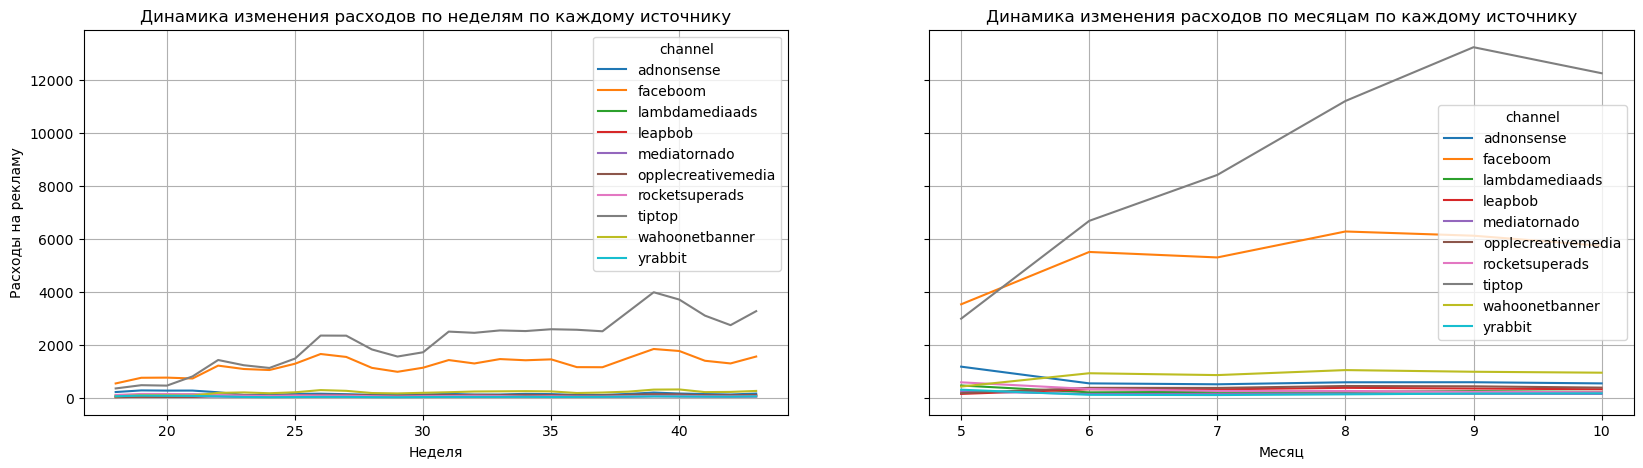

In [31]:
# задаём размер сетки для графиков
plt.figure(figsize=(20, 5))

# динамика расходов по неделям
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.xlabel('Неделя')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по неделям по каждому источнику')

# динамика расходов по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Расходы на рекламу')
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.show()

На графике изменеия расходов по неделям можно заметить, что самой дорогой оказалась 39 неделя (в частности, для каналов tiptop и faceboom), после нее пошел тренд на понижение расходов, однако ближе к концу октября был отскок и расходы вновь начали расти.  
  
На графике изменеия расходов по месяцам заметно значительное повышение расходов на рекламу на протяжении четырех месяцев (с мая по сентябрь) на канал tiptop, однако в октябре расходы пошли на спад. Расходы на рекламный канал tiptop за анализируемый период увеличился почти в 4.5 раза.  
  
Кроме этого, на графике расходов по месяцам выделяется канал faceboom, но расходы на этот канал значительно меньше, в сравнении с tiptop, да и показывает он себя по расходам стабильно, возможно была проведена своевременная оптимизация рекламного бюджета по нему.  
  
Минимальное повышение расходов наблюдается по каналу wahoonetbanner, по остальным каналам были незначительные вливания рекламного бюджета.

Рпассчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [32]:
cac_channel = (
    profiles
    .groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .rename(columns={'acquisition_cost':'avg_cac'})
    .sort_values(by='avg_cac', ascending=False)
    .reset_index()
)

cac_channel

channel  avg_cac
0              tiptop     2.80
1            faceboom     1.11
2          adnonsense     1.01
3      lambdamediaads     0.72
4      wahoonetbanner     0.60
5      rocketsuperads     0.41
6  opplecreativemedia     0.25
7             yrabbit     0.22
8        mediatornado     0.22
9             leapbob     0.21

Максимальная стоимость привлечения клиента из источников tiptop (2.80), faceboom (1.11) и adnonsense (1.01).  
Минимальная стоимость привлечения клиента из источников leapbob (0.21), mediatornado (0.22), yrabbit (0.22) и opplecreativemedia (0.25). 

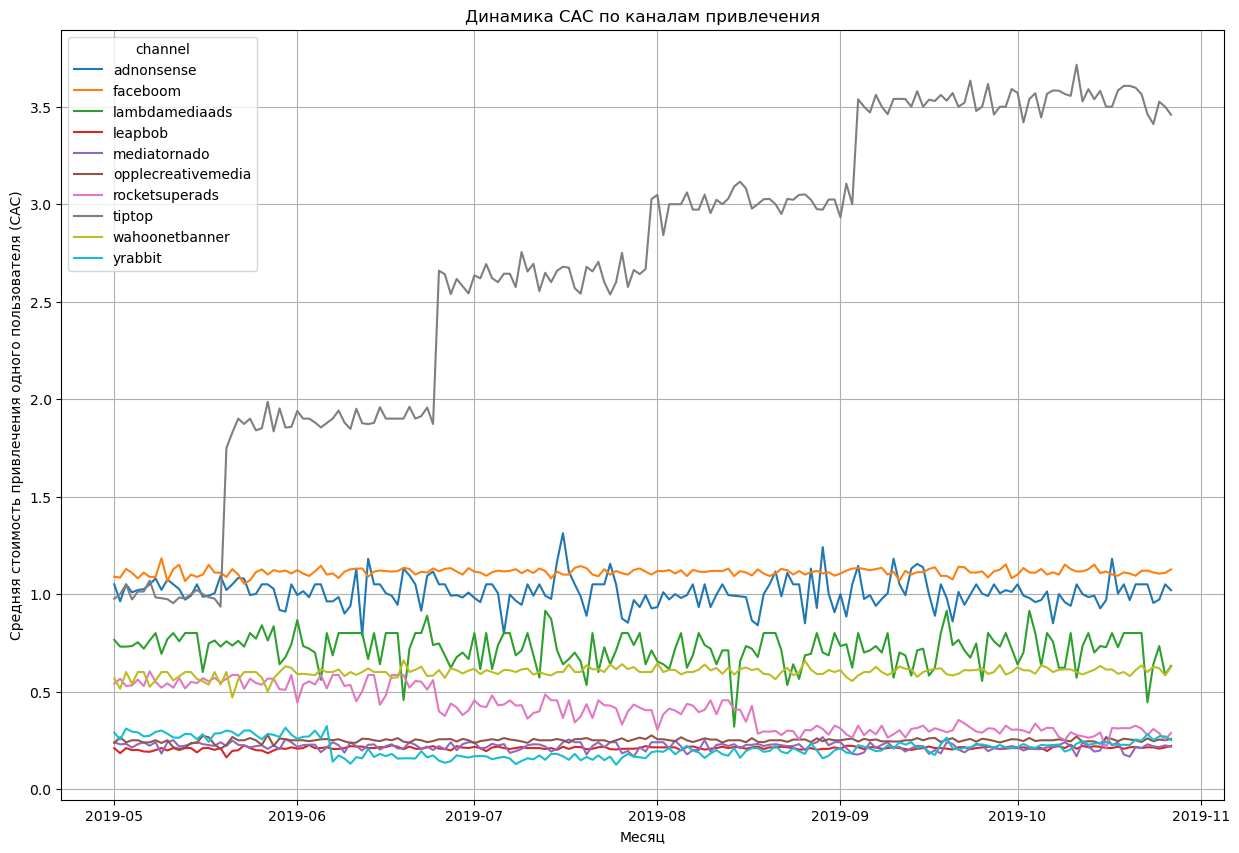

In [33]:
# построим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
).plot(figsize=(15, 10), grid=True)
plt.ylabel('Средняя стоимость привлечения одного пользователя (CAC)')
plt.xlabel('Месяц')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Рассчитаем средний CAC на одного пользователя для всего проекта

In [34]:
print('Средний САС на одного пользователя для всего проекта: {:.2}'.format(profiles['acquisition_cost'].mean()))

Средний САС на одного пользователя для всего проекта: 1.1


## Промежуточный вывод

1. Общая сумма расходов на рекламу составляет 105497;
2. 82,65% всего рекламного бюджета пришлось на каналы tiptop (54751.30) и faceboom (54751.30). Меньше всего расходов пришлось на каналы mediatornado (954.48) и yrabbit (944.22).
3. Исходя из графиков можно заметить что 39 неделя обошлась компании дороже всего (в частности, по каналам tiptop и faceboom), после чего пошел спад, однако ближе к концу октября расходы вновь начали расти. На графике расходов по месяцам также можно заметить значительное повышение расходов на рекламу на протяжении четырех месяцев (с мая по сентябрь) на канал tiptop, однако в октябре расходы пошли на спад. Расходы на рекламный канал tiptop увеличились в 4.5 раза. Расходы на канал faceboom значительно меньше, в сравнении с tiptop и наблюдается более стабильное поведение по расходам, можно предположить что была проведена своевременная оптимизация рекламного бюджета. Минимальное повышение расходов наблюдается по каналу wahoonetbanner, по остальным каналам были лишь незначительное финансрование рекламного бюджета.
4. Каналами с наиболее бюджетными условиями для рекламы являются - wahoonetbanner и adnonsense, по которым доля платящих пользователей составляет 5.30% и 11.34% соответственно;
5. Средний САС на одного пользователя для всего проекта не превышает 1.1, в то время как у рекламной сети tiptop средний САС составляет 2.80, что дороже в 2.5 раза. Рекламные каналы faceboom (1.11) и adnonsense (1.01) максимально приближены по стоимости к показателю для всего проекта. Самый низкий средний САС у источников leapbob, mediatornado, yrabbit и opplecreativemedia, они не превышают стоимости 0.25.
6. Стоимость привлечения клиентов на протяжении всего периода поэтапно повышалась у канала tiptop с 1 до 3.5. Каналы faceboom и wahoonetbanner вели себя стабильно в стоимости и держатся на 1 и на 0.5 соответственно.


CAC помогает анализировать эффективность каналов трафика: если стоимость клиента выросла и затраты на маркетинг не окупаются, стоит оптимизировать настройки рекламы или отключить её работу.

**Рассмотрим на самые популярные каналы:**

| Источник  | Расходы | Клиенты | САС |
|  :---:  |  :----:  |  :---:  |  :---:  |
| tiptop    | 54751.30   | 1878 | 29.15 |
| faceboom    | 32445.60 | 3557 | 9.12 |
| wahoonetbanner    | 5151.00 | 453 | 11.37 |
| adnonsense    | 3911.25 | 440 | 8.89 |

У компании существует возможность уделить внимание источникам wahoonetbanner и adnonsense т.к. количество клиентов, аналогичное tiptop, можно получить дешевле с выгодой более 20 тыс. Бюджет на tiptop нужно уменьшить.


**Рассмотрим на непопулярные каналы:**

| Источник  | Расходы | Клиенты | САС |
|  :---:  |  :----:  |  :---:  |  :---:  |
| rocketsuperads  | 1833.00 | 352 | 5.2 |
| leapbob  | 1797.60 | 262 | 6.86 |
| lambdamediaads  | 1557.60 | 225 | 6.92 |
| mediatornado    | 954.48 | 156 | 6.11 |
| yrabbit    | 944.22 | 165 | 5.72 |

Кроме этого, компания может уделить внимание источникам rocketsuperads, leapbob и lambdamediaads выделив на них больший бюджет, т.к. количество клиентов, аналогичное tiptop, можно получить дешевле с выгодой более 30 тыс.


## Расчет бизнес-показателей
Используя графики LTV, ROI и CAC, можно проанализировать окупаемость рекламы. Можно предположить, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [35]:
# установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Проанализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()

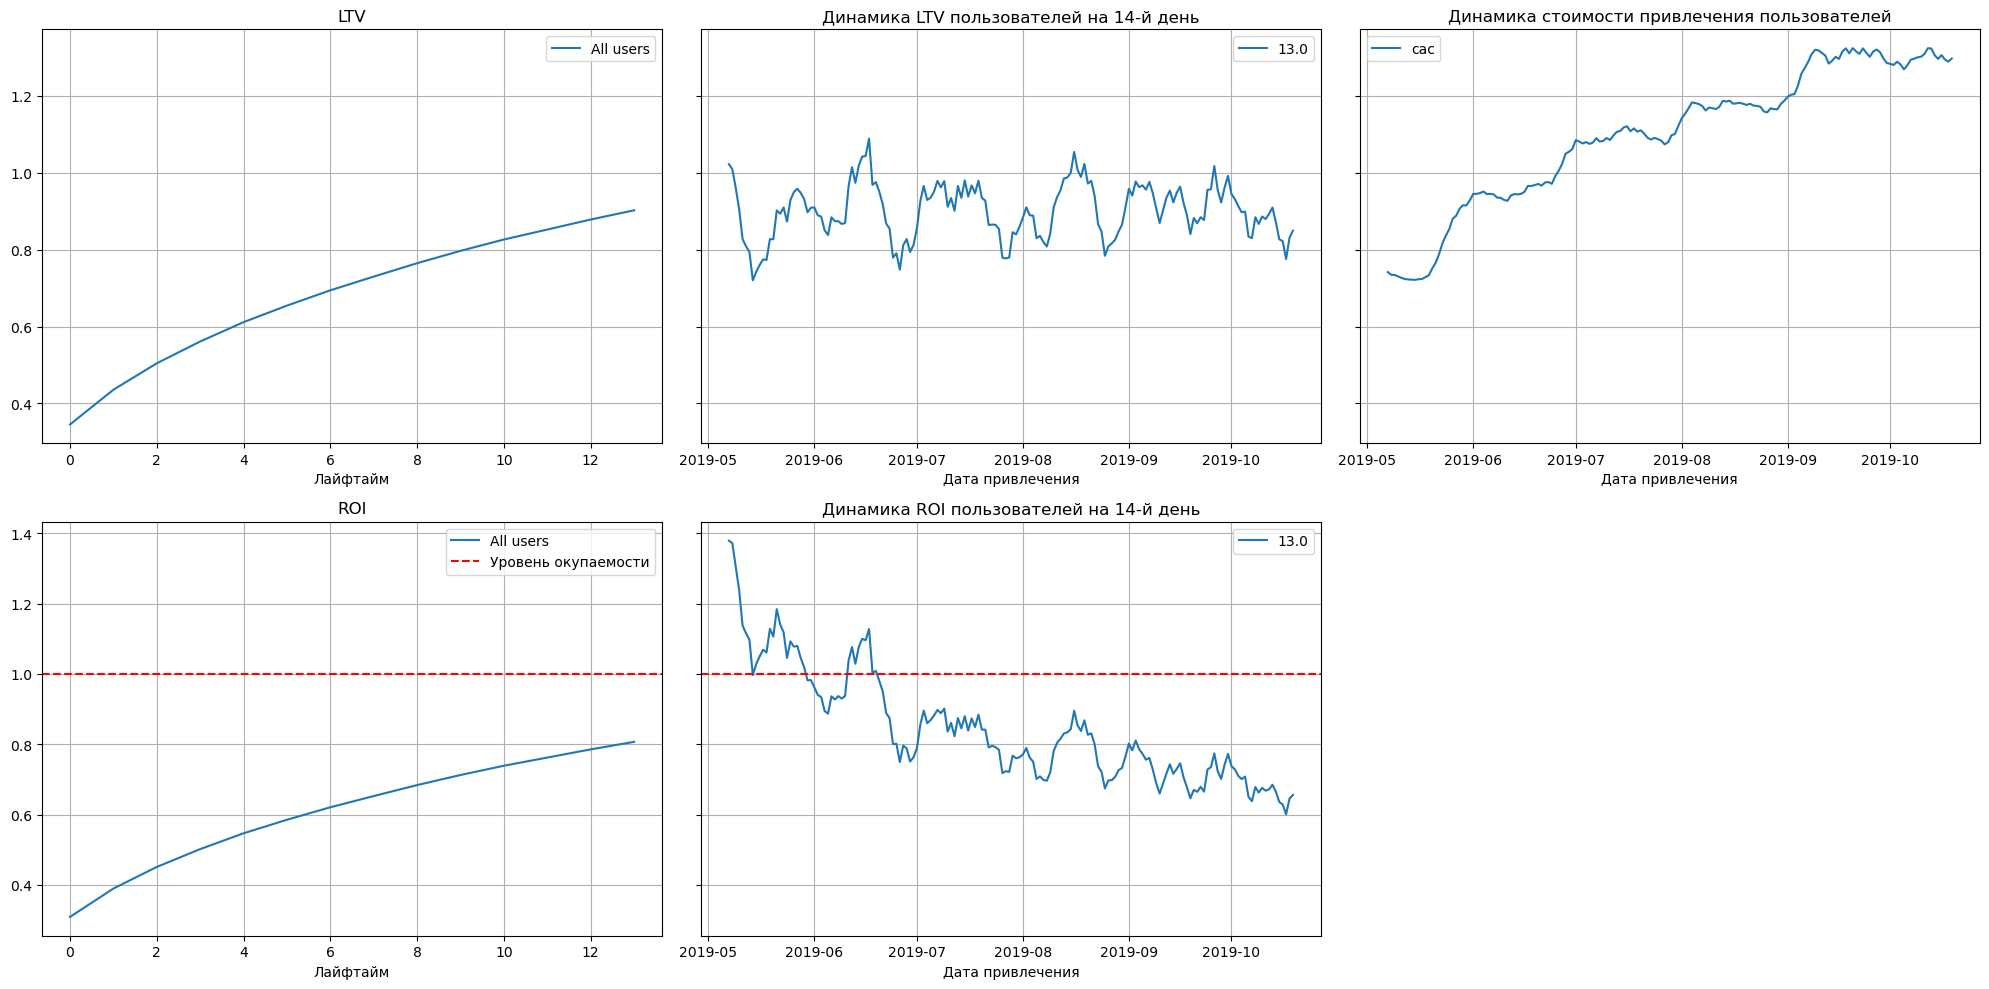

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Исходя из полученных графиков можно сделать следующие выводы:
- Значение LTV меньше значения CAC, это отрицательный момент т.к. значение LTV должно превышать значение CAC, чем больше разница между ними, тем лучше.
- Показатель CAC постоянно растёт, рентабельность рекламы ухудшается, и она приносит убыток. Вероятно сказывается влияние увеличения бюджета на плохо конверсионные рекламные источники, либо проблема в самой маркетинговой стратегии;
- ROI на 14 день составил 80%, реклама не окупается;  
- Динамика ROI пользователей снижается находится в основном ниже уровня окупаемости. 

Есть несколько способов снижения САС:
- оптимизировать воронку продаж (проанализировать путь пользователя приложения);
- оптимизировать ценообразование (слишком высокая цена может отпугнуть клиентов, можно подумать над доп акциями и скидками);
- оптимизировать расходы на рекламу (вкладываться только в эффективные рекламные источники);
- повышение лояльности бренда (улучшение приложения, диалог с пользователями и т.п.)

 
Чтобы увеличить LTV, также можно:  
- повышать лояльность клиентов (бесплатный тестовый период, демоверсии, бонусы, скидки, акции, подарки);
- увеличивать средний чек (например, создавать аудитории с максимальным счетом и таргетироваться на них в рекламных кампаниях);
- оптимизировать продукт (этого можно достигнуть путем стимулирования клиентов к продлению платной подписки, повторной покупки товара и т.д.).

Изучим конверсию пользователей и динамику её изменения

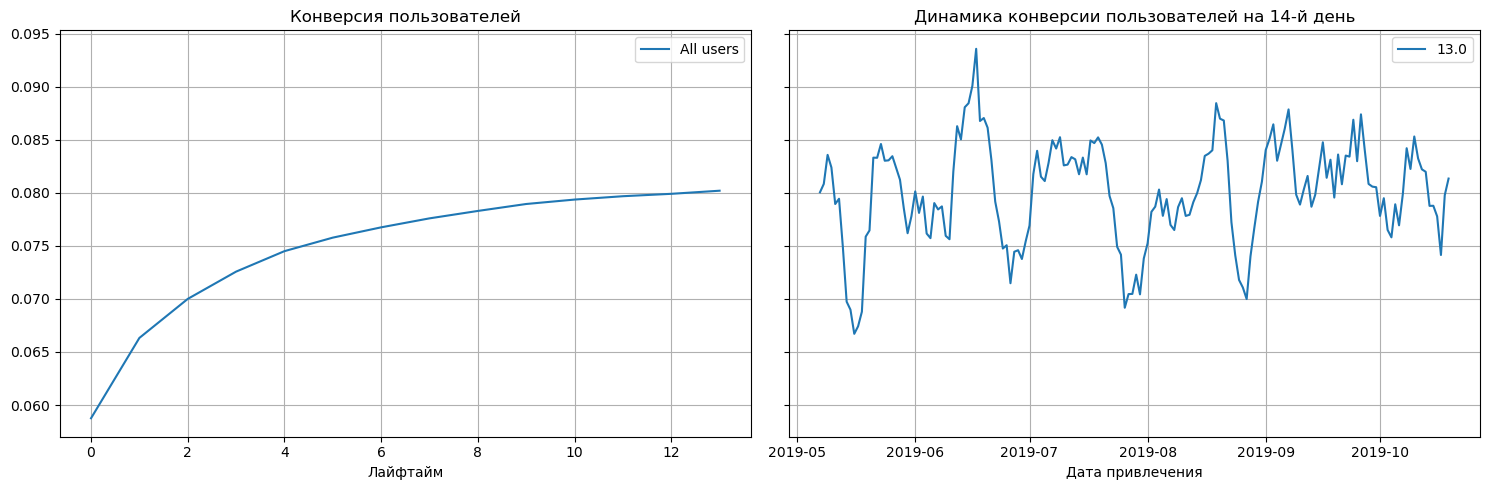

In [37]:
# рассмотрим конверсию без разбивки по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

1. Конверсия с 10 дня вышла на "плато" и более не увеличивалась.
2. Динамика конверсии сильно скачет. Конверсия судя по графику на конец периода составляет около 8%.

Изучим удержание пользователей и динамику его изменения

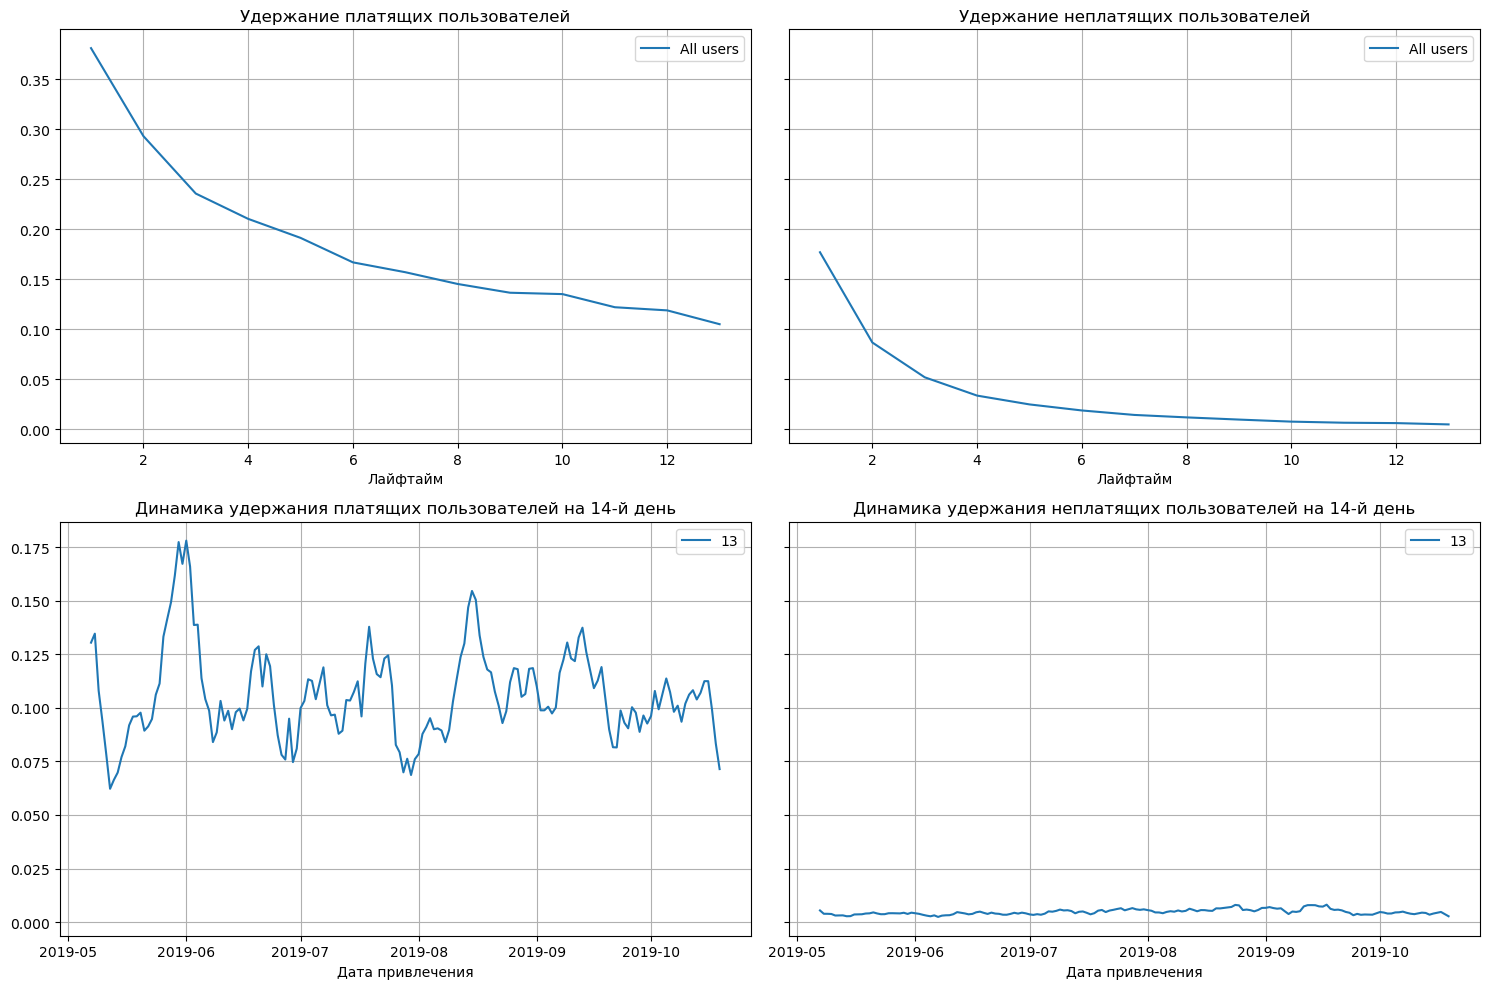

In [38]:
# рассмотрим удержание без разбивки по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Ближе к окончанию периода лишь около 10% платящих пользователей продолжают пользоваться Procrastinate Pro+.
К сожалению восходящий тренд отсутствует.

Изучим окупаемость рекламы с разбивкой по устройствам

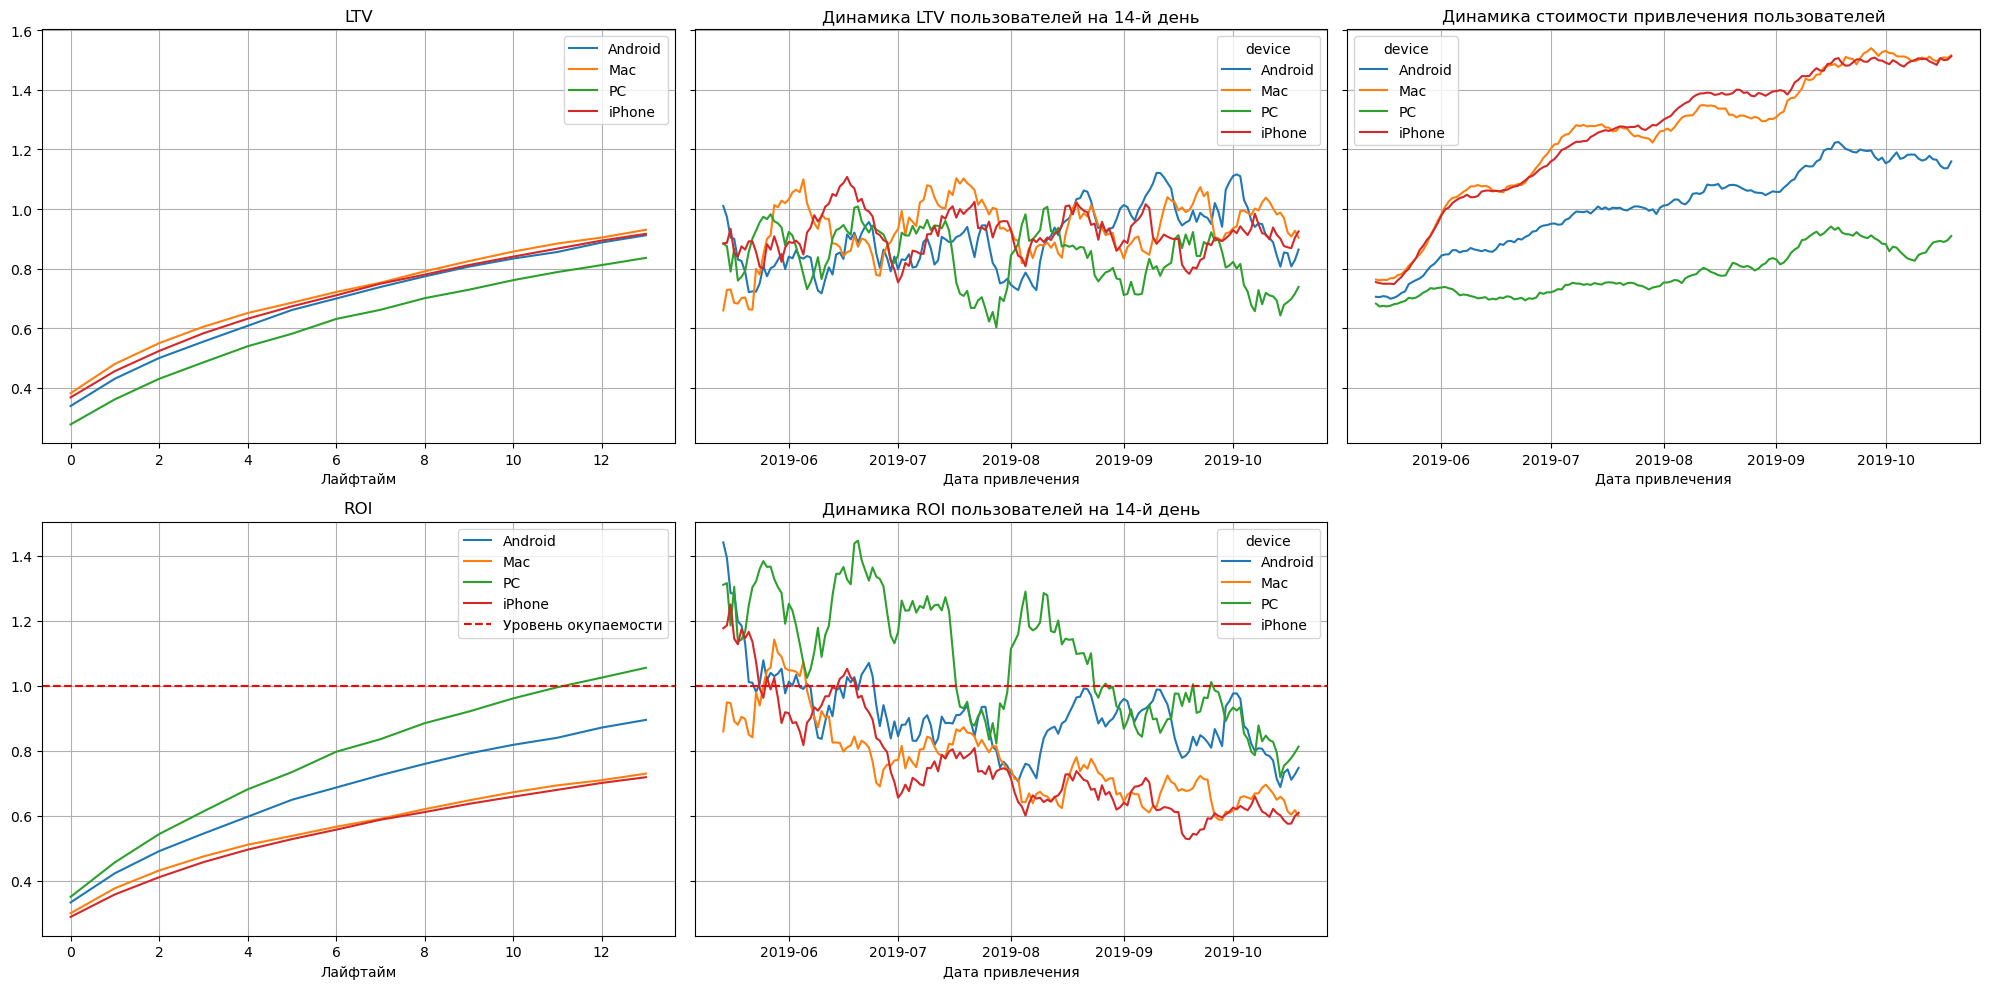

In [39]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Исходя из графиков получены неожиданные результаты:
1. LTV пользователей ведет себя стабильно вне зависимости от устройства. При этом пользователи, использующие PC приносят меньше всего выручки;
2. Можно наблюдать высокое увеличение показателя CAC в отношении пользователей с iPhone и Mac, выгоднее всего стоимость привлечения пользователей с PC;
3. исходя из ROI, пользователи PC стабильно окупаются, чуть ниже этот показатель у пользователей Android. Хуже всего окупаются владельцы устройств IPhone и Mac. 
4. Динамика ROI всех пользователей имеет тенденцию на понижение, однако ROI выше всего у пользователей с PC.

Исходя из графиков, маркетинговая стратегия выбрана верно для владельцев PC, возможно дело в плохой оптимизации продукта под другие платформы.

Изучим удержание с разбивкой по устройствам

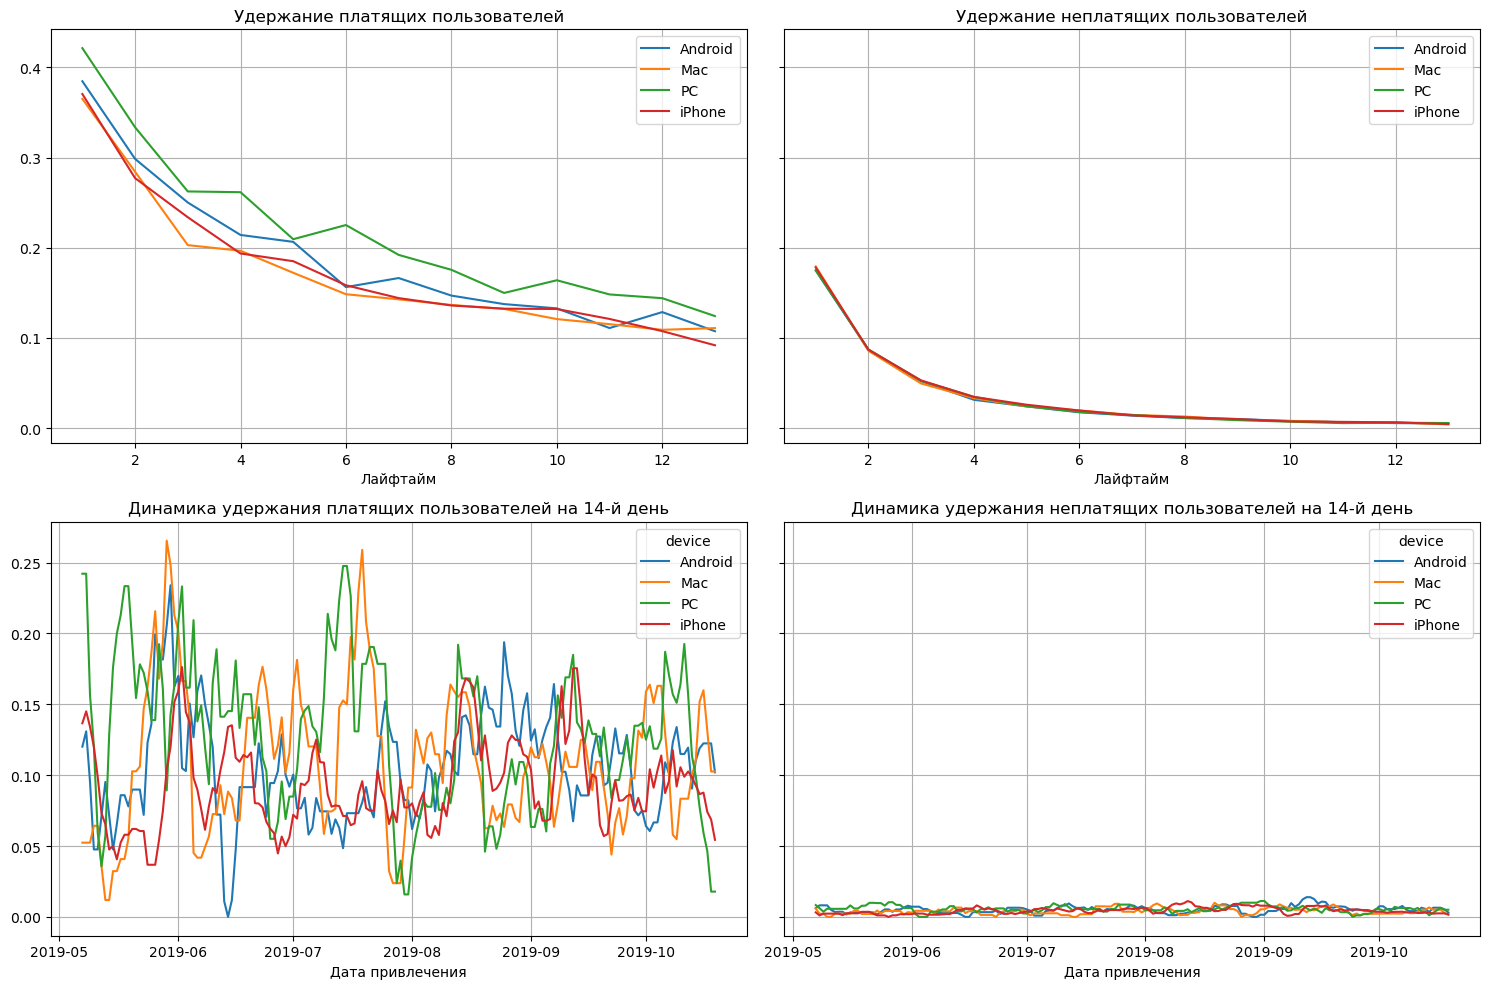

In [40]:
# рассмотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание по всем устройствам одинаковое, чуть лучше у PC, чуть хуже у Mac и Iphone.

Изучим окупаемость рекламы с разбивкой по странам

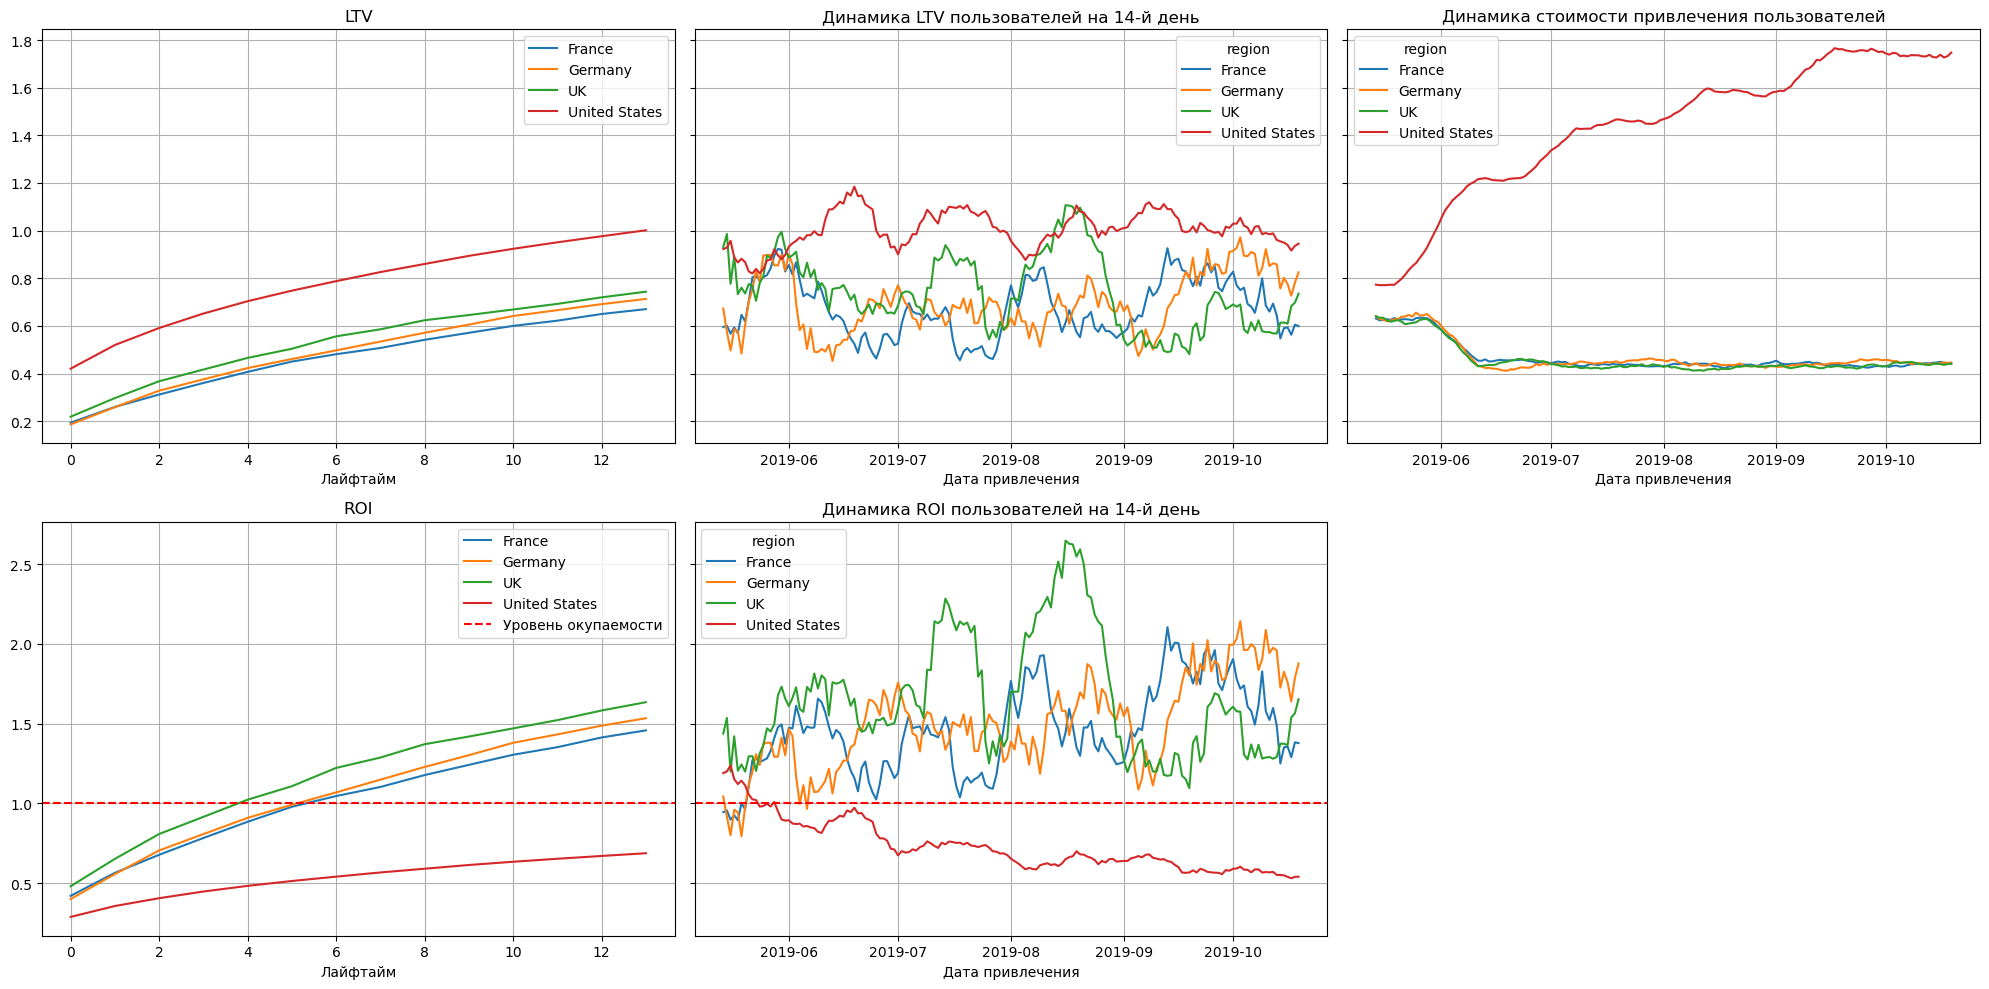

In [41]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Исходя из разбивки по странам  можно наблюдать интересные выводы:
1. Несмотря на то, что LTV выше всего у США, реклама не окупается совсем, стоимость привлечения растет, динамика ROI падает;
2. Остальные страны показывают похожую стоимость привлечения клиентов.
3. LTV Германии, Великобритании и Франции низкий, но при этом стабильный.
4. Наиболее окупаемой страной является Великобритания.
5. В основном реклама в европейских странах стала окупаться на 5-6 день.


Изучим окупаемость рекламы с разбивкой по рекламным каналам

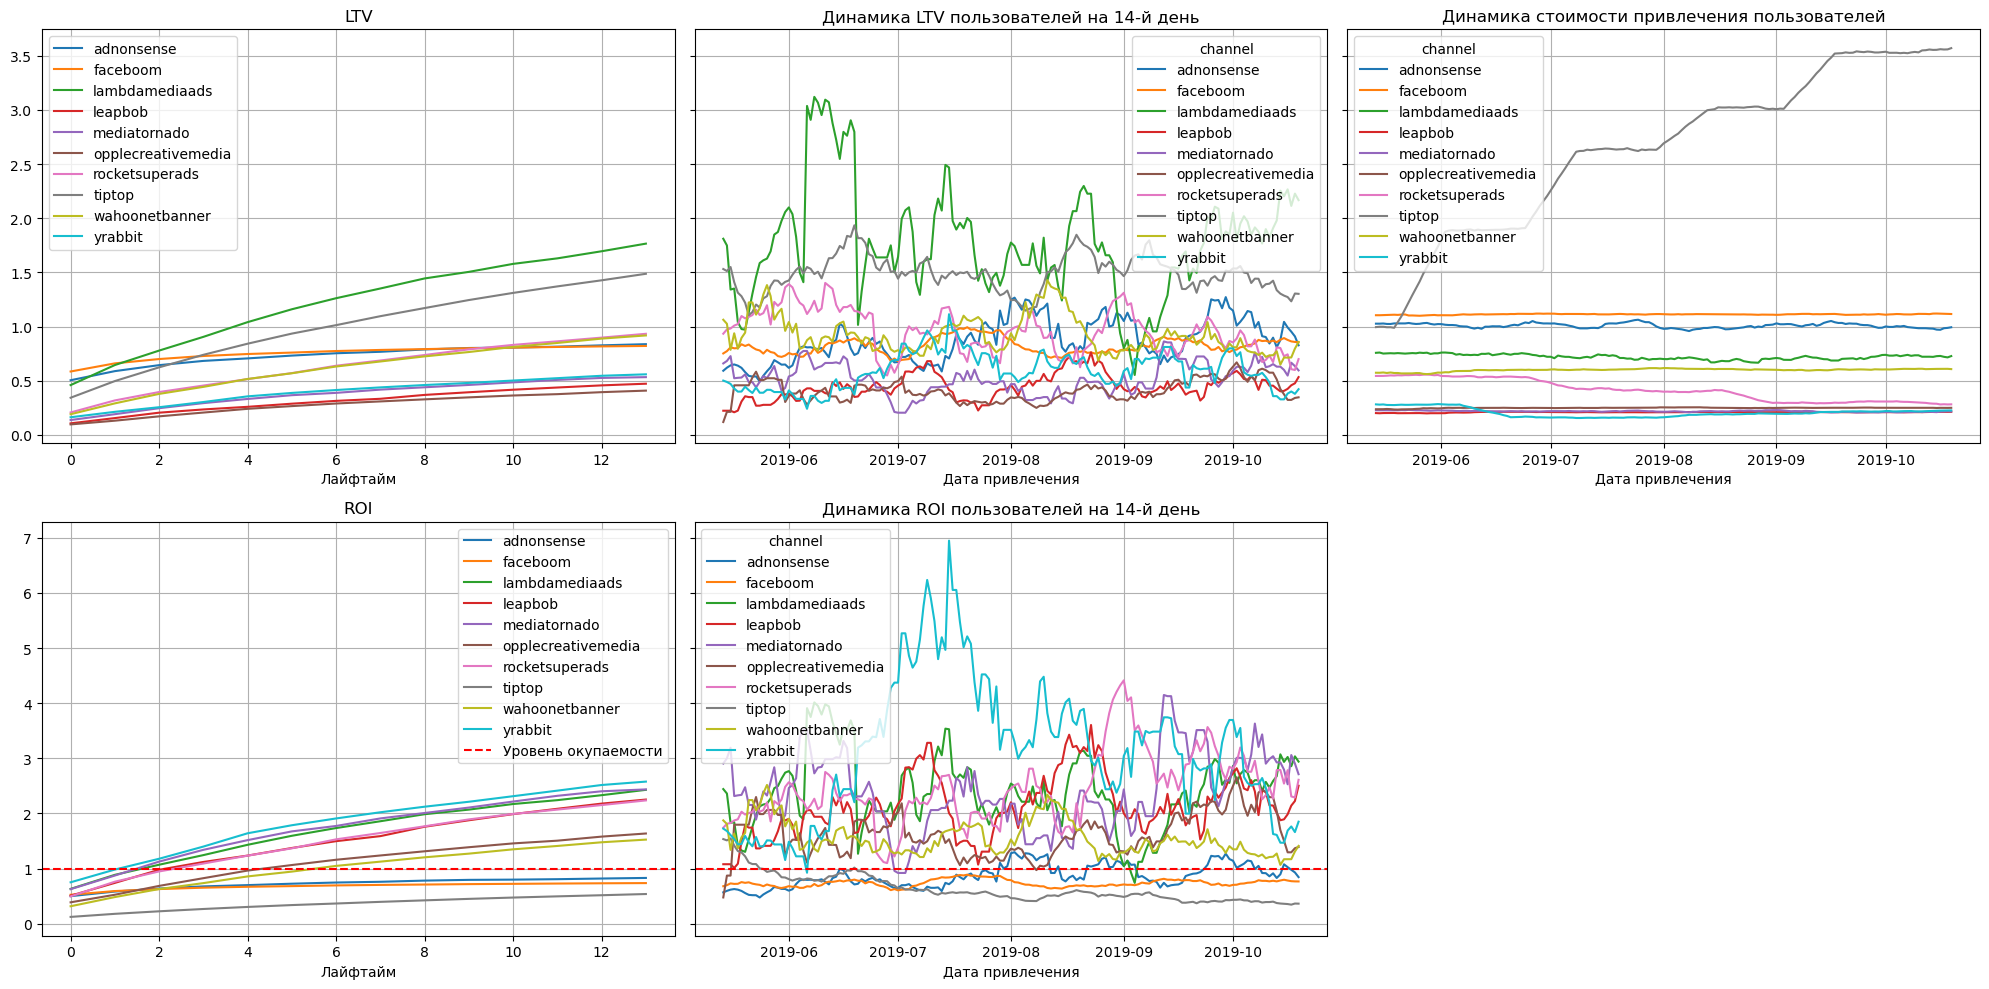

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Самый высокий LTV у lambdamediaads и tiptop;
2. Стоимость привлечения пользователей самая высокая у канала tiptop, наблюдается рост на протяжении всего периода;
3. Рекламная компания в каналах tiptop, faceboom и adnonsense убыточная,несмотря на то что эти каналы являются одними из самых популярных с точки зрения привлечения пользователей.

Изучим окупаемость рекламы для США с разбивкой по рекламным каналам

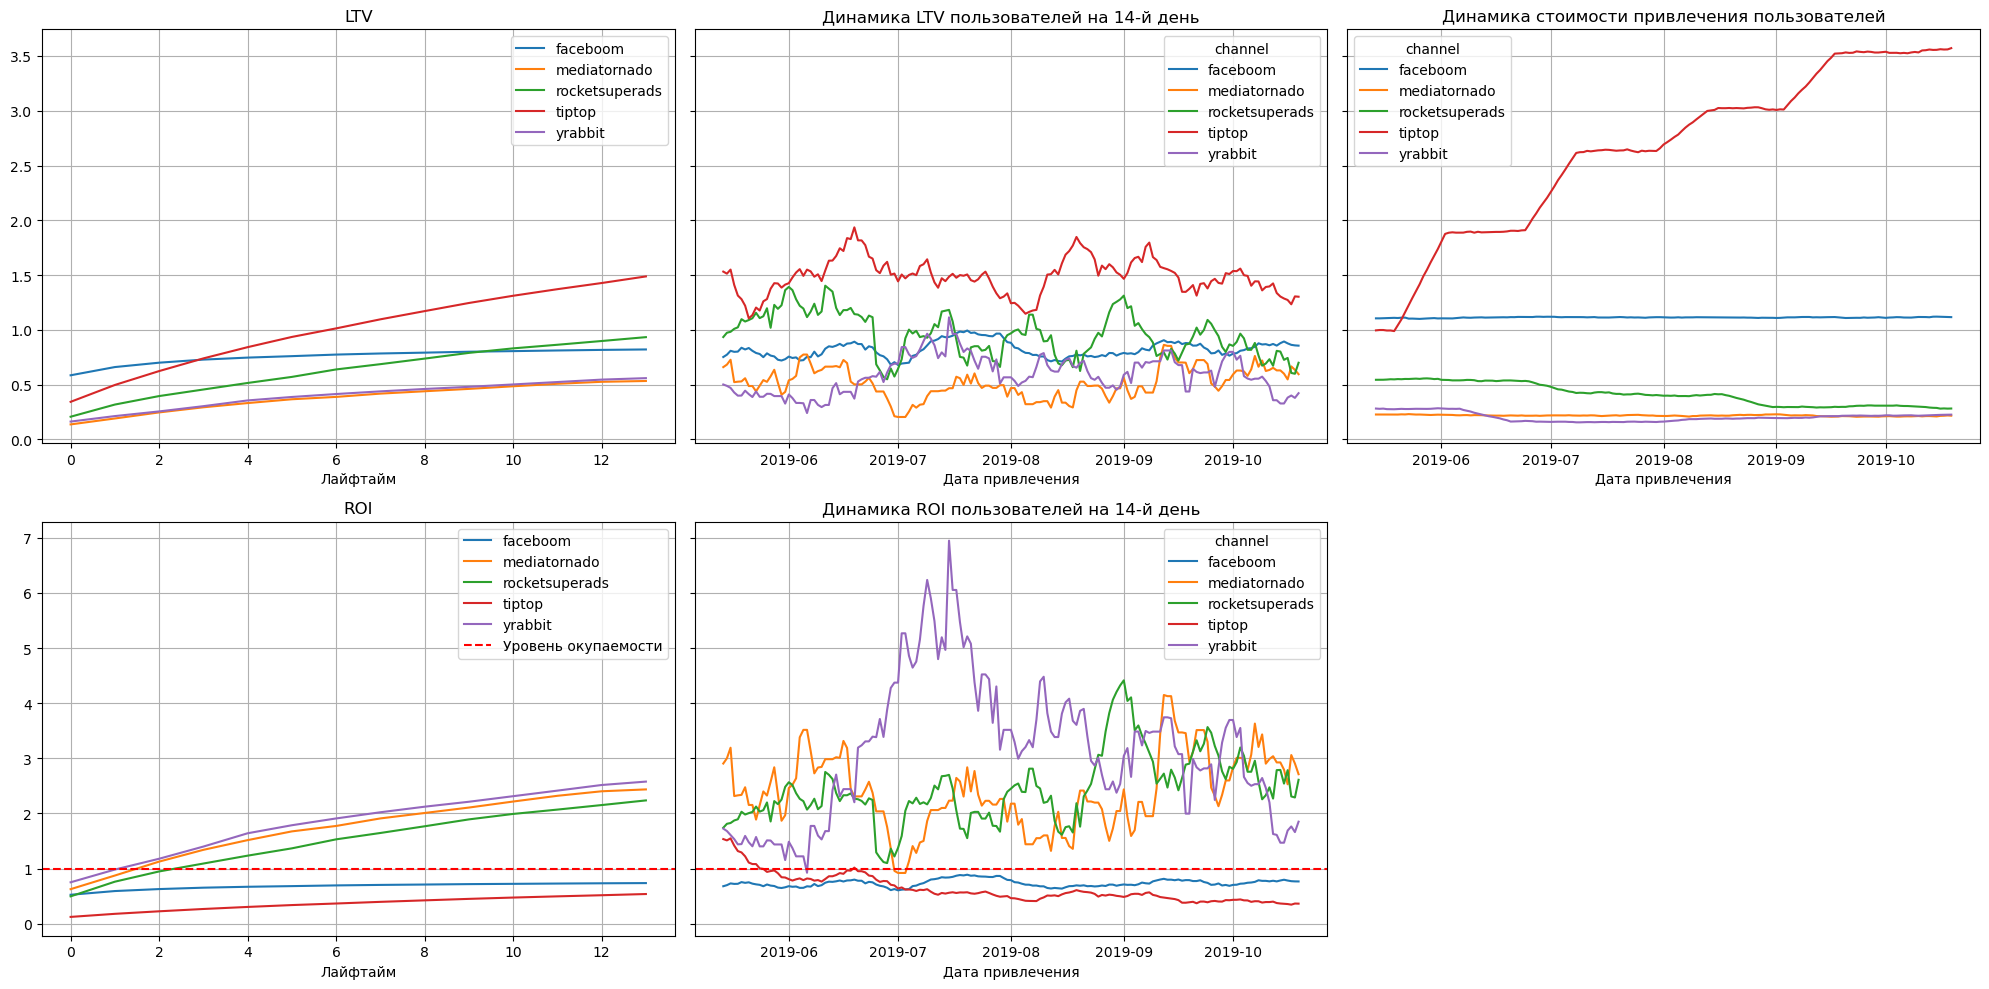

In [43]:
usa = profiles.query('region == "United States"')
dimensions = ['channel']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Несмотря на то, что показатель LTV выше у источника tiptop, он не окупается, аналогично себя показывает источник faceboom. За 2 недели они ни разу не преодолели уровень окупаемости;
2. Стоимость привлечения клиентов из tiptop постоянно растет, в то время как у faceboom стоимость высокая, но стабильная;
3. Очень хорошая положительная динамика ROI у канала yrabbit и низкая стоимость привлечения пользователей.
4. Также не плохо себя показывают каналы rocketsuperads и mediatornado.

Рекламному отделу определенно нужно изменить маркетинговую стратегию для рынка США, отказавшись от убыточных каналов tiptop и faceboom. Необходимо задействовать более перспективные источники, такие как yrabbit, rocketsuperads и mediatornado.

`Дополнительно проанализируем окупаемость рекламы для Европейских стран с разбивкой по рекламным каналам`

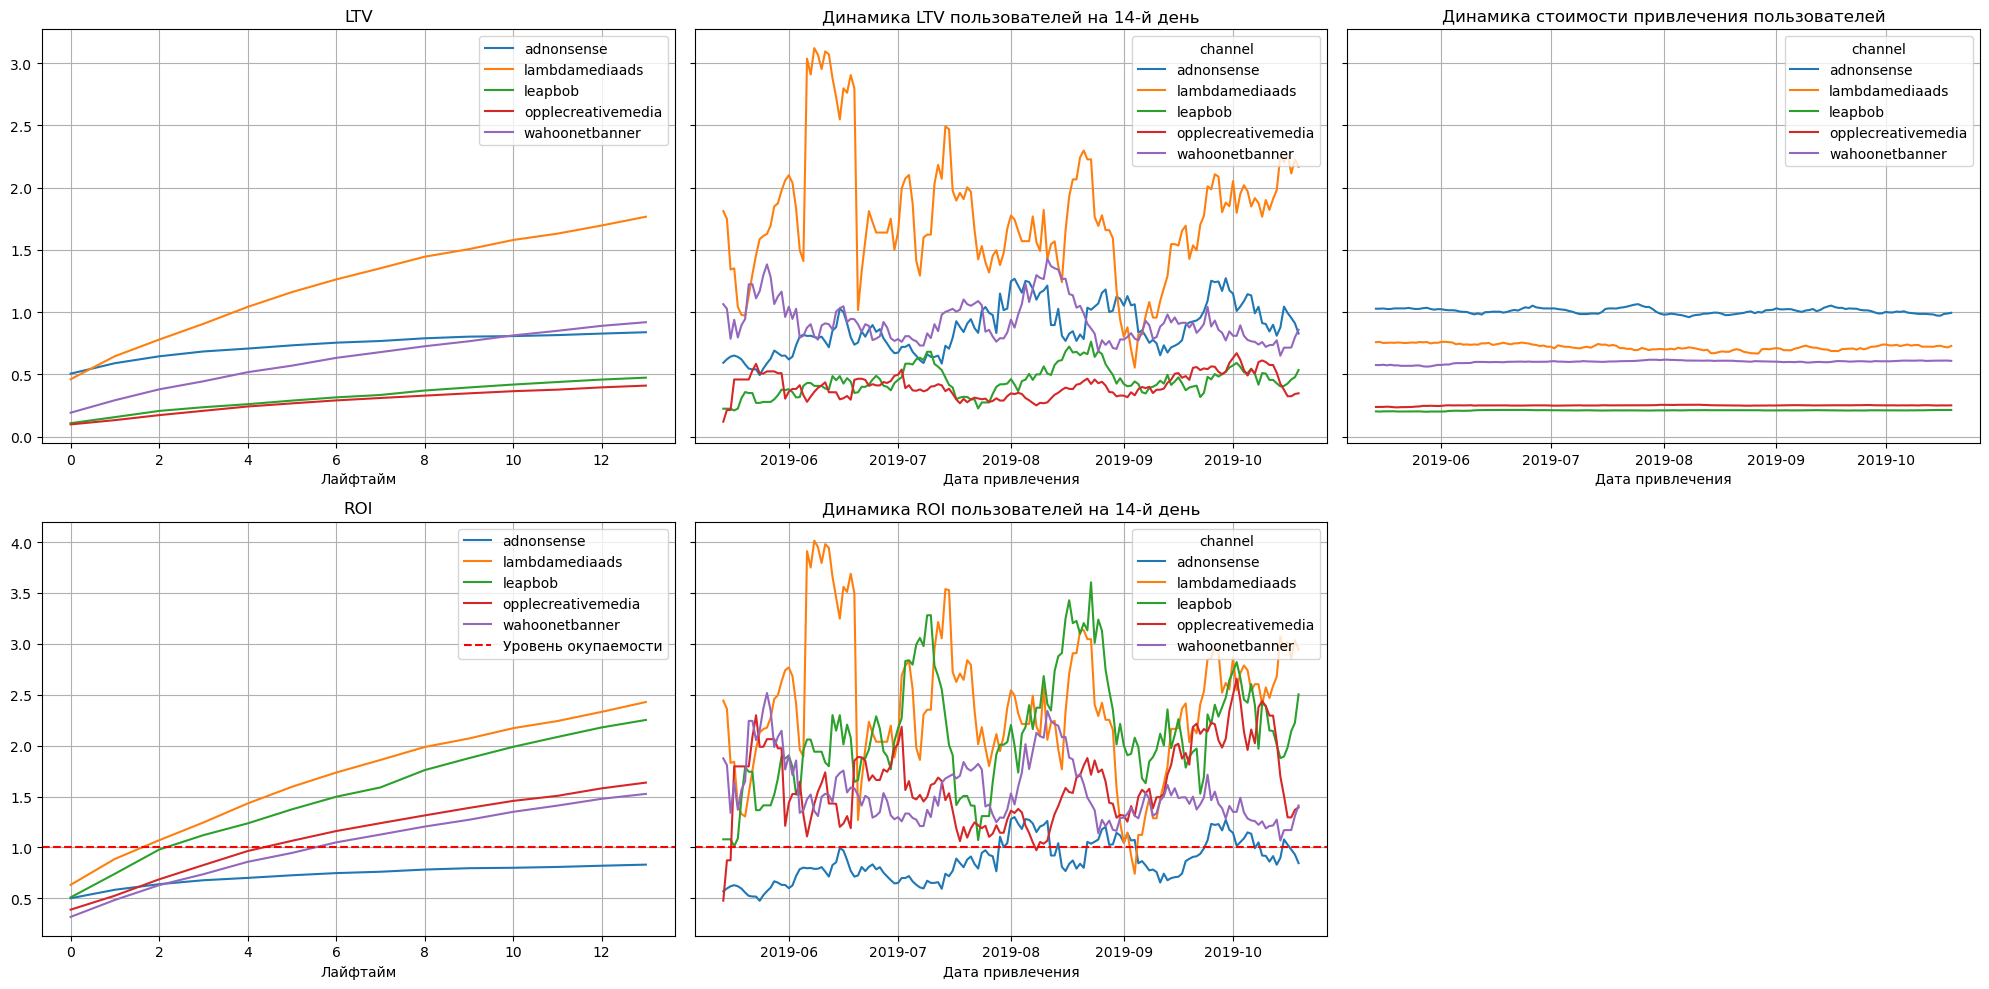

In [44]:
europe = profiles.query('region != "United States"')
dimensions = ['channel']


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

1. Канал lambdamediaads хорошо показывает себя в Европейских странах.
2. Убыточным рекламным каналом является adnonsense, за весь период не пересек уровень окупаемости, остальные каналы трафика начали окупаться на 4-5 день;
3. Динамика САС по всем рекламным каналам стабильна, без резких колебаний.

Изучим конверсию пользователей и динамику её изменения по странам

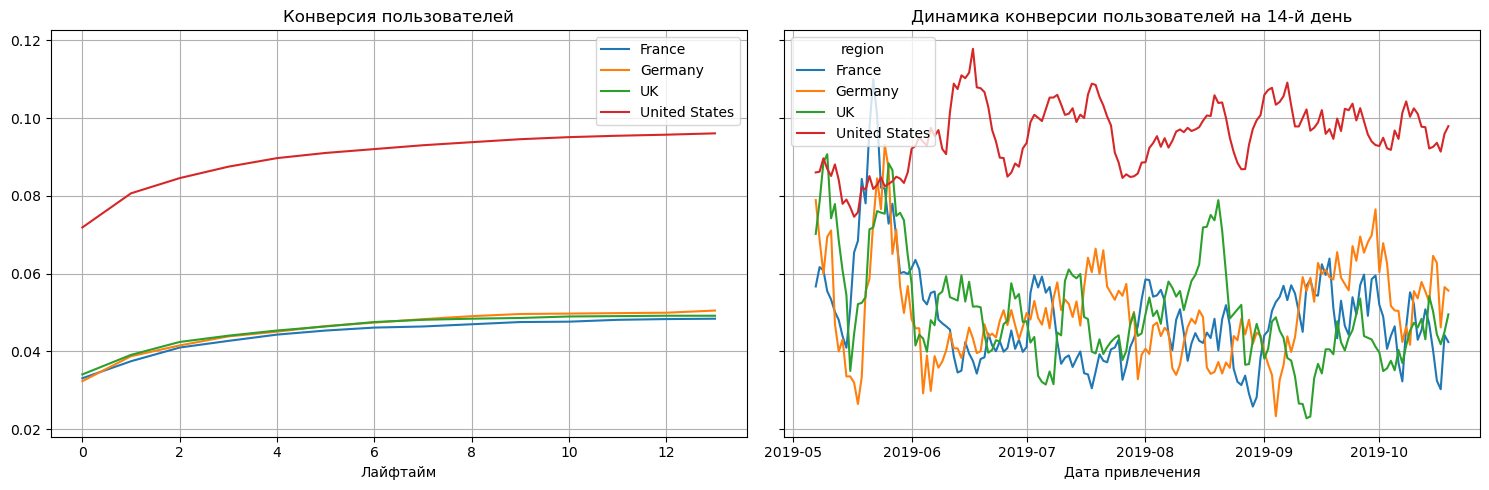

In [45]:
# рассмотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Из графиков видно, что лучше всего конвертируются пользователи из Америки, эта тенденция не меняется на протяжении всего анализируемого периода.

Проанализируем удержание пользователей по странам

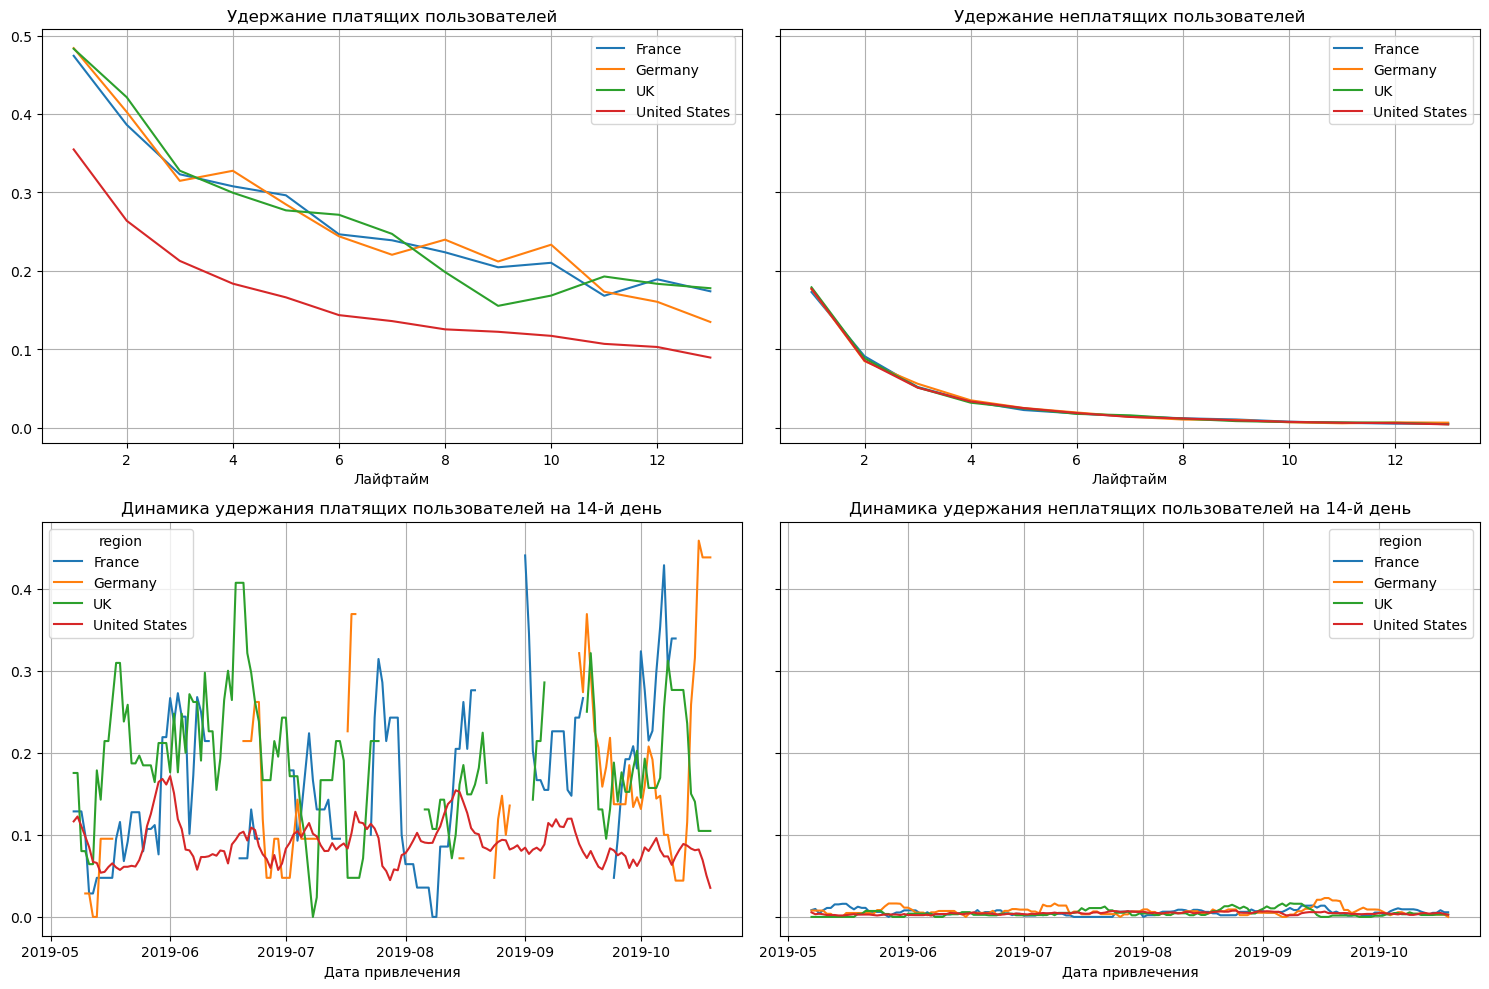

In [46]:
# рассмотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков видно, что пользователи из США удерживаются хуже пользователей европейских стран. 

Изучим конверсию пользователей и динамику её изменения по каналам

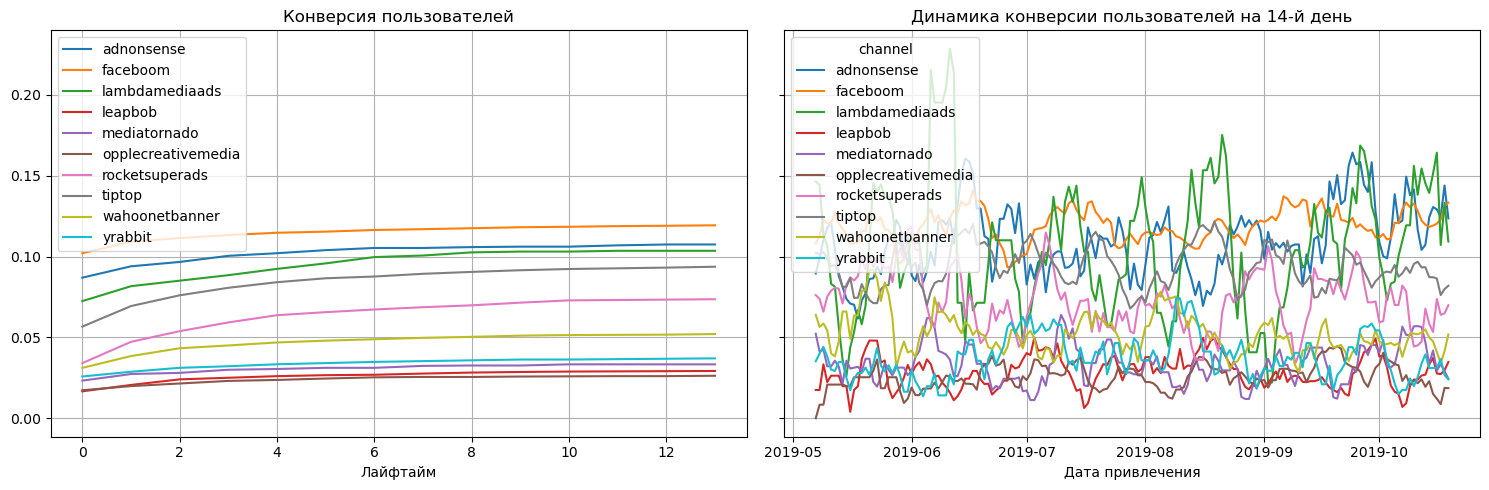

In [47]:
# рассмотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Из графиков видно, что лучше всего конвертируются пользователи с канала faceboom, adnonsense и lambdamediaads.

Изучим удержание пользователей по каналам

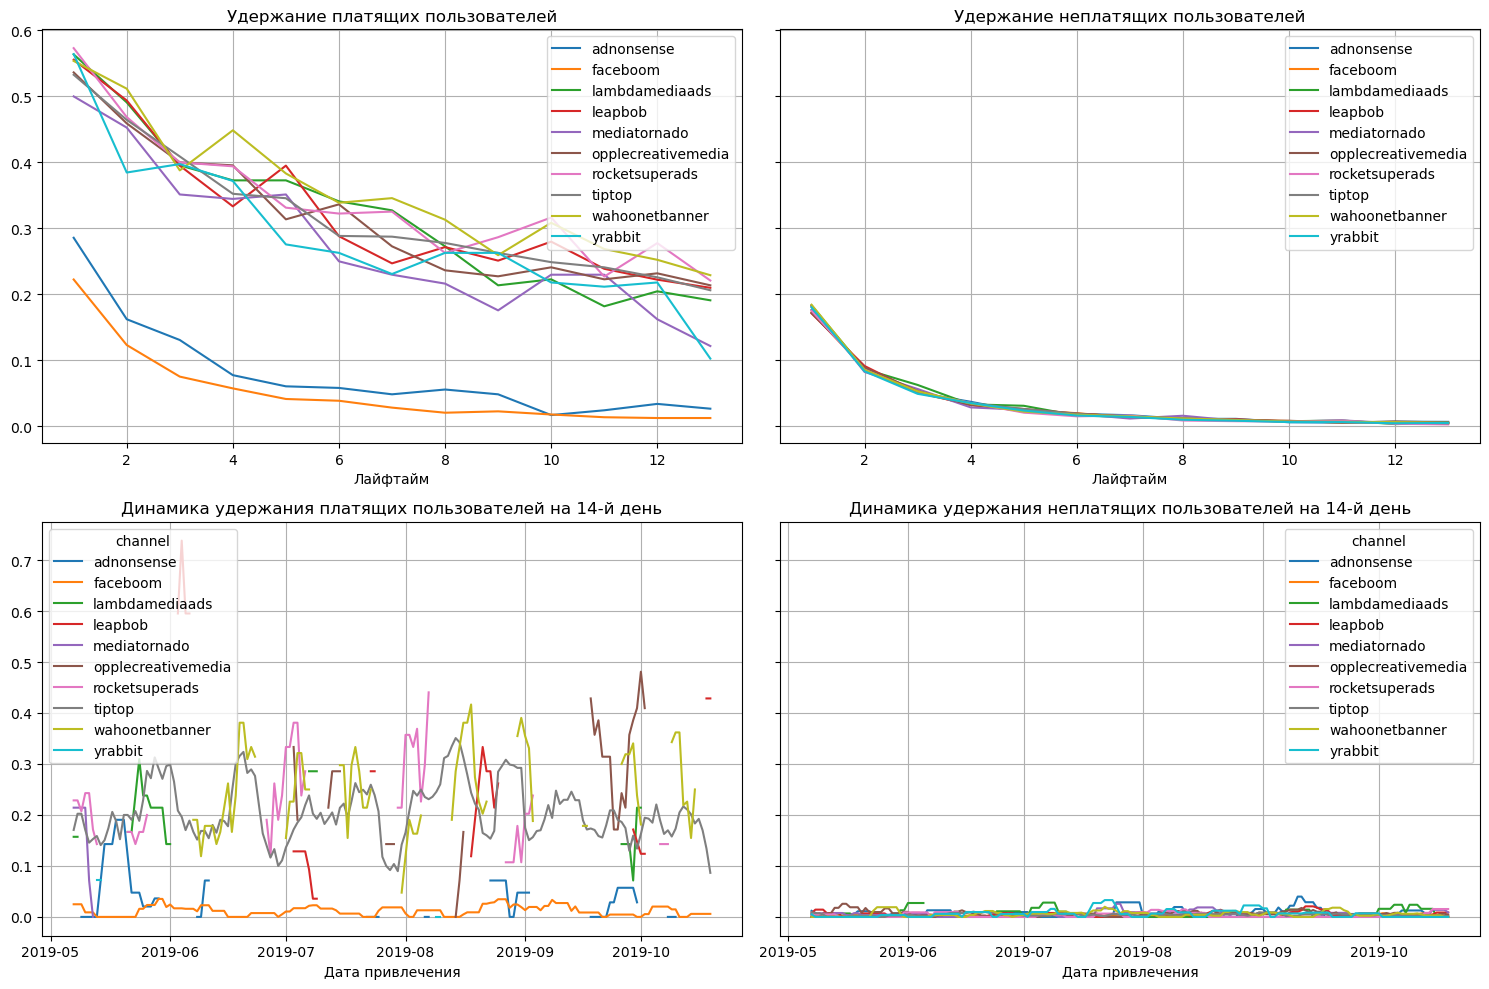

In [48]:
# рассмотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Неочевидный вывод, но на графиках удержания можно наблюдать, что каналы, которые лучше всего конвертируются - удерживаются хуже всего. В целом можно наблюдать, что есть проблема с удержанием пользователей т.к. на протяжении 2х недель "жизни" удержание пользователей сильно меняется от когорты к когорте.  
Предположительно это происходит из-за того, что отдел рекламы делал большую ставку на привлечение новых клиентов. В ожидании расширения клиентской базы можно преположить что прибыль будет расти. Но при детальном изучении можно заметить что именно постоянные лояльные пользователи чаще всего приносят больше всего прибыли.

Изучим конверсию пользователей и динамику её изменения по устройствам

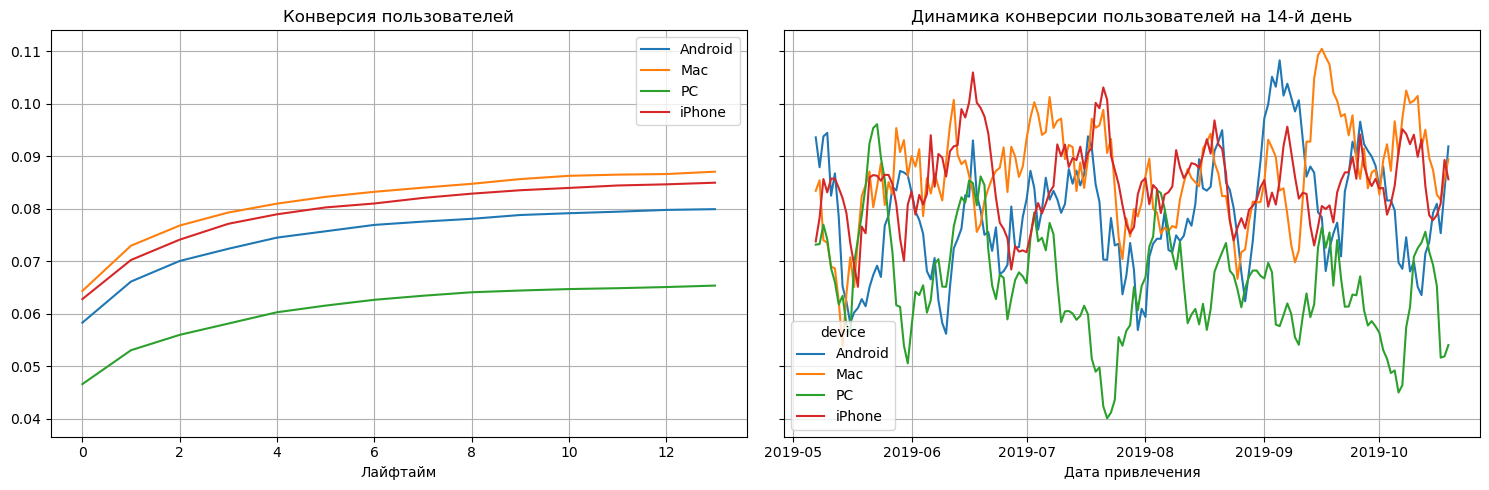

In [49]:
# рассмотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Неочевидный вывод, но исходя из графиков, пользователи PC конвертируются хуже всего. При этом остальные пользователи Mac, iPhone и Android демонстрируют стабильность на протяжении всего периода.

## Краткий вывод

Используя графики LTV, ROI и CAC, мы проанализировали окупаемость рекламы и пришли к следующим выводам:
1. Реклама, направленная на привлечение пользователей в целом не окупается, общий показатель LTV меньше значения CAC, причем САС постоянно растет. Это говорит о том, что 
компания несет убытки, у прибыльного бизнеса LTV должен быть выше CAC. Проблема может быть в завышенной цене либо пользователи делают оплату один раз и не возвращаются повторно. ROI снижается и находится ниже уровня окупаемости. Конверсия с 10 дня не растет, динамика конверсии сильно скачет. Среднее удержание судя по графику на конец периода составляет всего около 8%. К концу периода лишь около 10% платящих пользователей продолжают пользоваться Procrastinate Pro+. К сожалению восходящий тренд отсутствует.
2. Хуже всего окупает себя реклама для пользователей устройств IPhone и Mac. Пользователи PC конвертируются хуже всего, а остальные пользователи Mac, iPhone и Android демонстрируют стабильную конверсионность на протяжении всего анализируемого периода. 
3. Пользователи из США конвертируются лучше, чем пользователи из европейских стран. Однако, пользователи из США удерживаются хуже пользователей европейских стран. Несмотря на то, что LTV выше всего у США, реклама не окупается совсем, стоимость привлечения растет, динамика ROI падает.
4. Основные денежные средства были задействованы в рекламных каналах tiptop и faceboom в США, а также wahoonetbanner и adnonsense в Европе. На графиках удержания видно, что каналы, которые лучше всего конвертируются - удерживаются хуже всего. В целом видно, что есть проблема с удержанием пользователей. 
  
Причины, с которыми могут быть связаны проблемы окупаемости:
- Акцент был сделан исключительно на привлечение новых клиентов, но не их удержание;
- Плохо адаптировано приложение для устройств IPhone и Mac;
- Плохо адаптировано приложение для региона продажи, в частности для США;
- Рекламное предложение противоречит предлагаемому продукту;
- Проблемы с оплатой (нужно проследить путь пользователя);
- Установлена слишком высокая цена в/на приложение;
- Использование дорогих рекламных каналов и пренебрежение более дешевыми вариантами;
- Неправильно определена целевая аудитория приложения;
- Отсутствие повышения лояльности клиентов (бесплатный тестовый период, демоверсии, бонусы, скидки, акции, подарки и т.д.).

Решить эти проблемы можно:
- Оптимизировав воронку продаж;
- Оптимизировав ценообразование;
- Оптимизировав расходы на рекламу (использовать другие рекламные каналы);
- Оптимизировав приложение под определенного пользователя, устройство и регион.

Универсальный способ сократить расходы на привлечение пользователей к сожалению отсутствует. Стоимость клиента нужно рассчитывать на постоянной основе. Если в прошлом периоде канал трафика работал хорошо, это не значит, что в этом он принесёт бизнесу такой же объем выручки и прибыли.

## Общий вывод

Для определения причин убыточности рекламной кампании развлекательного приложения Procrastinate Pro+, проанализированы три датафрейма: visits, orders, costs с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

1. Общая сумма расходов на рекламу составила 105497. На графике динамики расходов по месяцам отображено значительное повышение расходов на рекламу на протяжении четырех месяцев (с мая по сентябрь), однако в октябре расходы пошли на спад.

2. Существуют различия в количестве пользователей в странах:
- США является лидером по количеству привлеченных пользователей - на 100002 человек, конверсия составляет 6.9%;
- в Германии привлечено 14981 человек, конверсия - 4.11%;
- в Великобритании привлечено 17575 человек, конверсия - 3.98%;
- во Франции привлечено 17450 человек, конверсия - 3.80%.  
Наибольшее количество пользователей было привлечено в октябре, а наименьшее в августе 2019 года.

3. Количество привлеченных пользователей в разрезе используемых устройств:
- больше всего переходов с iPhone - 54479 человек, конверсия -  6.21%;
- с Mac зафиксировано - 30042 человек, конверсия - 6.36%;
- с Android зафиксировано - 35032 человек, конверсия - 5.85%;
- с PC зафиксировано - 30455 человек, конверсия - 5.05%.

4. Было задействовано в общей сложности 10 платных рекламных каналов, однако не все из них привлекли большое количество пользователей: 
- через канал faceboom пришло 29144 человек, конверсия -  12.20%;
- через канал adnonsense пришло 3880 человек, конверсия -  11.34%;
- через канал lambdamediaads пришло 2149 человек, конверсия -  10.47%;
- через канал tiptop пришло 19561 человек, конверсия -  9.60%;
- через канал rocketsuperads пришло 4448 человек, конверсия -  7.91%;
- через канал wahoonetbanner пришло 8553 человек, конверсия -  5.30%.

5. Общая оценка показателей выявила следующее:
- значение LTV меньше значения CAC, это плохо т.к. значение LTV должно превышать значение CAC;
- показатель CAC постоянно растёт, рентабельность рекламы ухудшается, и она приносит убыток;
- средний САС на одного пользователя для всего проекта - 1.1;
- ROI на 14 день составил 80%, реклама не окупается;
- динамика ROI пользователей снижается находится в основном ниже уровня окупаемости;
- конверсия с 10 дня перестала расти и судя по графику на конец периода составляет около 8%;
- к концу 14 дня лишь около 10% клиентов продолжают пользоваться Procrastinate Pro+. Удержание платящих клиентов ожидаемо выше удержания неплатящих клиентов, ведь им есть, что терять.

6. Рекламный рынок имеет разграничения на американский и европейский, присутствуют свои проблемы и особенности, которые могут являться причинами, вызывающими убытки.

**Причины убыточности рекламы в США:**
- постоянный рост стоимости привлечения клиентов, к тому же стоимость очень высокая;
- низкий ROI, окупается примерно на 60-70%;
- низкий уровень удержания пользователей, на 14й день остается активными лишь 10% пользователей;
- больше всего рекламных затрат пришлось на американский tiptop (54751.30) и faceboom (32445.60), в октябре оба канала оказались в просадке.
Канал `tiptop` не окупается, LTV не успевает за постоянно растущим САС. 
Несмотря на хорошую конверсионность, у канала `faceboom` очень низкий уровень удержания пользователей.
- несмотря на хороший показатель конверсии, LTV намного меньше CAC в отношении пользователей с iPhone и Mac, а ROI достигает не более 70-75%, также и удержание этих пользователей ниже по сравнению с другими устройствами;
- реклама направлена исключительно на привлечение новых пользователей, а не удержание старых;
- скорее всего есть технические проблемы (не очень хорошая совместимость с устройствами или другие проблемы на пути пользователя);
- не оптимизированный, завышенный рекламный бюджет;
- недостаточно задействованы другие каналы для привлечения трафика.

**Причины убыточности рекламы в Европе:**
-  наблюдается низкий уровень конверсии, не превышает 5%;
-  присутствует убыточный канал adnonsense, который за весь анализируемый период так и не пересек уровень окупаемости, LTV близок к САС. Также, у данного канала очень низкий уровень удержания пользователей;
- реклама направлена исключительно на привлечение новых пользователей, а не удержание старых;
- рекламный бюджет завышен и не оптимален;
- стоит задействовать другие каналы для привлечения трафика;
  

**Рекомендации рекламному отделу:**

- Более детально изучить свою целевую аудиторию, учитывая возраст и пол, профессию, географию, поведенческие особенности и т.п.;
- Необходимо совместно с разработчиками отследить путь клиента, чтобы убедиться, что нет проблем с приложением при использовании, регистрации и оплате на устройствах iPhone и Mac на стороне компании;
- провести работу над удержанием пользователей и добавить УТП для клиентов в виде (бесплатного тестового периода, демоверсии, бонусов, скидок, акций, подарков и т.д.);
- Необходимо оптимизировать рекламный бюджет, пропорционально распределив его между различными источниками;
- проверить чтобы рекламное предложение не противоречило предлагаемому приложению;


**В качестве альтернативных рекламных каналов следует присмотреться:**
- `на американском рынке` к yrabbit  т.к. у него наблюдается очень хорошая положительная динамика ROI и низкая стоимость привлечения пользователей (0.22). У канала расход составил всего 944.22;
- `на американском рынке` к rocketsuperads, САС аналогичен каналу yrabbit (0.22), а количество клиентов, аналогичное tiptop (1878), можно получить дешевле с выгодой более 30 тыс. На данный момент расход по каналу составляет всего 1833.00, конверсия 5.2%;
- `на европейском рынке` к  leapbob и lambdamediaads (высокий LTV) выделив на них больший бюджет, т.к. количество клиентов, аналогичное tiptop, можно получить дешевле с выгодой более 30 тыс;
- `на европейском рынке` к wahoonetbanner т.к. количество клиентов, аналогичное tiptop(1878), можно получить дешевле с выгодой более 20 тыс.